In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

# Questions
1. Are the distribution of ratings for recipes based on their categories consistent?
2. Overtime, can you see popularity in certain "health" foods show up?
3. Do certain keywords correspond to reviews? 

# Import CSVs

In [2]:
# Import recipes and look at first 5 rows
recipes = pd.read_csv("../og_files/recipes.csv")
recipes.head(5)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


# Question 1: Average Rating Based on Categories? 

In [4]:
# Take a look at columns of the recipes df
recipes.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

In [5]:
# Look at category options
recipes["RecipeCategory"].unique()

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Pie', 'Chicken', 'Dessert', 'Southwestern U.S.',
       'Sauces', 'Stew', 'Black Beans', '< 60 Mins', 'Lactose Free',
       'Weeknight', 'Yeast Breads', 'Whole Chicken', 'High Protein',
       'Cheesecake', 'Free Of...', 'High In...', 'Brazilian', 'Breakfast',
       'Breads', 'Bar Cookie', 'Brown Rice', 'Oranges', 'Pork',
       'Low Protein', 'Asian', 'Potato', 'Cheese', 'Halibut', 'Meat',
       'Lamb/Sheep', 'Very Low Carbs', 'Spaghetti', 'Scones',
       'Drop Cookies', 'Lunch/Snacks', 'Beans', 'Punch Beverage',
       'Pineapple', 'Low Cholesterol', '< 30 Mins', 'Quick Breads',
       'Sourdough Breads', 'Curries', 'Chicken Livers', 'Coconut',
       'Savory Pies', 'Poultry', 'Steak', 'Healthy', 'Lobster', 'Rice',
       'Apple', 'Broil/Grill', 'Spreads', 'Crab', 'Jellies', 'Pears',
       'Chowders', 'Cauliflower', 'Candy', 'Chutneys', 'White Rice',
       'Tex Mex', 'Bass', 'German', 'Fru

### Making 6 Major Categories to Compare

In [6]:
# There are > 266 categories
# Will make lists of major categories to sort:
# Tarts and Scones will not be included as they can also be savory (not dessert)
dessert = ["dessert", "Bar Cookie", "Ice Cream", "Cheesecake", "Frozen Dessert", "Candy", "Drop Cookies", "Pie", "Key Lime Pie", "Coconut Cream Pie", "Chocolate Chip Cookies", "Bread Pudding"]
breakfast_brunch = ["Breakfast", "Breakfast Casseroles", "Brunch"]
holiday = ["Memorial Day", "Thanksgiving", "St. Patrick's Day", "Halloween", "Christmas", "Easter", "Labor Day", "Birthday", "Hanukkah"]
healthy = ["Very Low Carbs", "Low Cholesterol", "Healthy", "High Fiber"]
breads =["Yeast Breads", "Breads", "Quick Breads", "Sourdough Breads", "Buttermilk Biscuits", "Wheat Bread"]
quick = ["< 30 Mins", "< 15 Mins", "< 60 Mins", "Weeknight", "Quick Breads"]

In [7]:
x = round((recipes.loc[recipes["RecipeCategory"].isin(dessert)]["AggregatedRating"]).mean(), 2)
x

4.6

In [8]:
# Will make a dictionary comprehension to look at average rating based on category
categories = [dessert, breakfast_brunch, holiday, healthy, breads, quick]
categories_strings = ['dessert', 'breakfast_brunch', 'holiday', 'healthy', 'breads', 'quick']

rating_by_category_dict = {
     
    label: round((recipes.loc[recipes["RecipeCategory"].isin(cat)]["AggregatedRating"]).mean(), 2)
    for label, cat in zip(categories_strings, categories)
}


In [9]:
rating_by_category_dict

{'dessert': 4.6,
 'breakfast_brunch': 4.64,
 'holiday': 4.67,
 'healthy': 4.64,
 'breads': 4.6,
 'quick': 4.62}

<Figure size 4320x216 with 0 Axes>

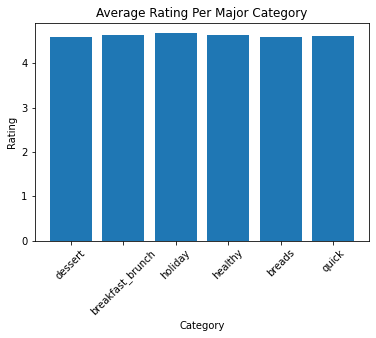

<Figure size 4320x216 with 0 Axes>

In [10]:
# Make a bar chart to display
# Grab the ratings from the dictionary
ratings = [y for key,y in rating_by_category_dict.items()]
plt.bar(categories_strings, ratings)
plt.xlabel("Category")
plt.xticks(rotation = 45)
plt.ylabel("Rating")
plt.title("Average Rating Per Major Category")
plt.figure(figsize=(60, 3))

# Question 1 Part 2: Similar average ratings, what do the distributions look like for each major category?

In [11]:
recipes_major_cat_df = recipes.loc[recipes["RecipeCategory"].isin(dessert+breakfast_brunch+holiday+quick+healthy+breads), ["Name", "RecipeCategory", "AggregatedRating"]]

In [12]:
recipes_major_cat_df

,Name,RecipeCategory,AggregatedRating
5,Best Blackbottom Pie,Pie,1.0
7,Buttermilk Pie With Gingersnap Crumb Crust,Pie,4.0
10,Boston Cream Pie,Pie,2.0
18,Buttermilk Pie,Pie,5.0
25,Cabbage and Sausage Soup,< 60 Mins,5.0
...,...,...,...
522510,Slow-Cooker Classic Coffee Cake,Breads,NaN
522511,Meg's Pumpkin Spice Bread,Quick Breads,NaN
522513,Roast Prime Rib au Poivre with Mixed Peppercorns,Very Low Carbs,NaN
522514,Kirshwasser Ice Cream,Ice Cream,NaN


In [13]:
# Function to grab major category
def grab_category(x):
    #categories_strings = ['dessert', 'breakfast_brunch', 'holiday', 'healthy', 'breads', 'quick']
    for num in range(len(categories)):
        if x in categories[num]:
            return categories_strings[num]

In [14]:
# Fix the RecipeCategory columns so that it will only list one of the six major categories as a possible category
recipes_major_cat_df["RecipeCategory"] = [grab_category(x) for x in recipes_major_cat_df["RecipeCategory"]]
recipes_major_cat_df

,Name,RecipeCategory,AggregatedRating
5,Best Blackbottom Pie,dessert,1.0
7,Buttermilk Pie With Gingersnap Crumb Crust,dessert,4.0
10,Boston Cream Pie,dessert,2.0
18,Buttermilk Pie,dessert,5.0
25,Cabbage and Sausage Soup,quick,5.0
...,...,...,...
522510,Slow-Cooker Classic Coffee Cake,breads,NaN
522511,Meg's Pumpkin Spice Bread,breads,NaN
522513,Roast Prime Rib au Poivre with Mixed Peppercorns,healthy,NaN
522514,Kirshwasser Ice Cream,dessert,NaN


In [15]:
# Make a dictionary where the keys are the categories and the valuries are their raing
# Can see that some categories are missing some aggregatedrating values
x =list( np.arange(1,5.5,0.5))
y = {
    c: list(recipes_major_cat_df.loc[recipes_major_cat_df["RecipeCategory"]==c,:].groupby("AggregatedRating").count()["Name"])
    for c in categories_strings
}

In [16]:
# Make a list of dictionaries
# Each dictionary contains the aggregated rating as the key and the values are the frequency 
# list is in the same order as the categories_strings
list_of_dicts = [(recipes_major_cat_df.loc[recipes_major_cat_df["RecipeCategory"]==r,:].groupby("AggregatedRating").count()["Name"]).to_dict() for r in categories_strings]
list_of_dicts

[{1.0: 206,
  1.5: 5,
  2.0: 162,
  2.5: 72,
  3.0: 597,
  3.5: 296,
  4.0: 2275,
  4.5: 1913,
  5.0: 10404},
 {1.0: 81,
  1.5: 2,
  2.0: 75,
  2.5: 32,
  3.0: 347,
  3.5: 171,
  4.0: 1776,
  4.5: 1505,
  5.0: 7366},
 {1.0: 3, 3.0: 10, 3.5: 6, 4.0: 39, 4.5: 29, 5.0: 200},
 {1.0: 28, 2.0: 26, 2.5: 16, 3.0: 143, 3.5: 39, 4.0: 595, 4.5: 461, 5.0: 2581},
 {1.0: 167,
  1.5: 4,
  2.0: 150,
  2.5: 59,
  3.0: 630,
  3.5: 307,
  4.0: 2519,
  4.5: 2227,
  5.0: 10363},
 {1.0: 58,
  1.5: 2,
  2.0: 69,
  2.5: 20,
  3.0: 355,
  3.5: 125,
  4.0: 1769,
  4.5: 1129,
  5.0: 7105}]

In [17]:
# Create base dictionary to include every possible aggregated rating with default freuqnecy as 0
base = {1.0: 0, 1.5:0, 2:0, 2.5:0, 3.0: 0, 3.5: 0, 4.0: 0, 4.5: 0, 5.0: 0}

In [18]:
# Union the base dictionary with each of the categorie dicitionaries to ensure that no category is missing an aggregated rating 
categories_dict_complete = [base | d for d in list_of_dicts]
categories_dict_complete

[{1.0: 206,
  1.5: 5,
  2: 162,
  2.5: 72,
  3.0: 597,
  3.5: 296,
  4.0: 2275,
  4.5: 1913,
  5.0: 10404},
 {1.0: 81,
  1.5: 2,
  2: 75,
  2.5: 32,
  3.0: 347,
  3.5: 171,
  4.0: 1776,
  4.5: 1505,
  5.0: 7366},
 {1.0: 3, 1.5: 0, 2: 0, 2.5: 0, 3.0: 10, 3.5: 6, 4.0: 39, 4.5: 29, 5.0: 200},
 {1.0: 28,
  1.5: 0,
  2: 26,
  2.5: 16,
  3.0: 143,
  3.5: 39,
  4.0: 595,
  4.5: 461,
  5.0: 2581},
 {1.0: 167,
  1.5: 4,
  2: 150,
  2.5: 59,
  3.0: 630,
  3.5: 307,
  4.0: 2519,
  4.5: 2227,
  5.0: 10363},
 {1.0: 58,
  1.5: 2,
  2: 69,
  2.5: 20,
  3.0: 355,
  3.5: 125,
  4.0: 1769,
  4.5: 1129,
  5.0: 7105}]

In [19]:
# Turn list of dictionaries into a dataFrame and make the index the categories
d = pd.DataFrame(categories_dict_complete)
d.index = categories_strings
d

,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
dessert,206,5,162,72,597,296,2275,1913,10404
breakfast_brunch,81,2,75,32,347,171,1776,1505,7366
holiday,3,0,0,0,10,6,39,29,200
healthy,28,0,26,16,143,39,595,461,2581
breads,167,4,150,59,630,307,2519,2227,10363
quick,58,2,69,20,355,125,1769,1129,7105


<AxesSubplot:>

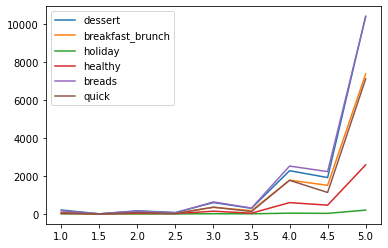

In [20]:
# Transpose the aggregated rating (columns) with the catergories (index) for better readability and ease with graphing
categories_with_ratings_df = d.transpose()
categories_with_ratings_df.plot()

In [23]:
categories_with_ratings_df

,dessert,breakfast_brunch,holiday,healthy,breads,quick
1.0,206,81,3,28,167,58
1.5,5,2,0,0,4,2
2.0,162,75,0,26,150,69
2.5,72,32,0,16,59,20
3.0,597,347,10,143,630,355
3.5,296,171,6,39,307,125
4.0,2275,1776,39,595,2519,1769
4.5,1913,1505,29,461,2227,1129
5.0,10404,7366,200,2581,10363,7105


## Statistics of Each Category Aggregated Rating

In [28]:
recipes_major_cat_df.loc[recipes_major_cat_df["RecipeCategory"] == "dessert", "AggregatedRating"].describe()

count    15930.000000
mean         4.599686
std          0.731338
min          1.000000
25%          4.500000
50%          5.000000
75%          5.000000
max          5.000000
Name: AggregatedRating, dtype: float64

<AxesSubplot:>

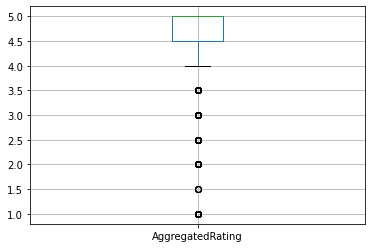

In [32]:
dessert_ratings = pd.DataFrame(recipes_major_cat_df.loc[recipes_major_cat_df["RecipeCategory"] == "dessert", "AggregatedRating"])
dessert_ratings.boxplot()

# Question 2: Over Time, have certain ingrediants increase in popularity? 

In [3]:
recipes.dtypes

RecipeId                        int64
Name                           object
AuthorId                        int64
AuthorName                     object
CookTime                       object
PrepTime                       object
TotalTime                      object
DatePublished                  object
Description                    object
Images                         object
RecipeCategory                 object
Keywords                       object
RecipeIngredientQuantities     object
RecipeIngredientParts          object
AggregatedRating              float64
ReviewCount                   float64
Calories                      float64
FatContent                    float64
SaturatedFatContent           float64
CholesterolContent            float64
SodiumContent                 float64
CarbohydrateContent           float64
FiberContent                  float64
SugarContent                  float64
ProteinContent                float64
RecipeServings                float64
RecipeYield 

In [8]:
# Make a df of the date and recipe ingredients
ingredients_df = recipes.loc[:,['Name', 'DatePublished', 'RecipeIngredientParts']]
ingredients_df.head(5)

,Name,DatePublished,RecipeIngredientParts
0,Low-Fat Berry Blue Frozen Dessert,1999-08-09T21:46:00Z,"c(""blueberries"", ""granulated sugar"", ""vanilla ..."
1,Biryani,1999-08-29T13:12:00Z,"c(""saffron"", ""milk"", ""hot green chili peppers""..."
2,Best Lemonade,1999-09-05T19:52:00Z,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""..."
3,Carina's Tofu-Vegetable Kebabs,1999-09-03T14:54:00Z,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""..."
4,Cabbage Soup,1999-09-19T06:19:00Z,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c..."


In [9]:
# Need to convert the DatePublished to date time format
ingredients_df = ingredients_df.astype({'DatePublished': 'datetime64'})
ingredients_df["YearPublished"] = ingredients_df["DatePublished"].dt.to_period("Y")
ingredients_df.head(1)

,Name,DatePublished,RecipeIngredientParts,YearPublished
0,Low-Fat Berry Blue Frozen Dessert,1999-08-09 21:46:00,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",1999


In [12]:
# Get the number of overall recipes per month
recipes_yearly = pd.DataFrame(ingredients_df.groupby("YearPublished")["Name"].count())
recipes_yearly

,Name
YearPublished,
1999,3673
2000,1886
2001,7714
2002,32456
2003,29372
2004,26686
2005,41002
2006,51409
2007,70204


In [15]:
# Find all lines of text that one the buzzwords
p = '[cC]auliflower'        # ? means find 0 or 1 instance of the previous character
cauliflower = pd.DataFrame((ingredients_df[ingredients_df['RecipeIngredientParts'].str.contains(p)]).groupby("YearPublished")["Name"].count())
cauliflower_percent = cauliflower.merge(recipes_yearly, on="YearPublished", how="left")
cauliflower_percent["proportion"] = (cauliflower_percent["Name_x"] / cauliflower_percent["Name_y"]*100)
cauliflower_percent

,Name_x,Name_y,proportion
YearPublished,,,
1999,21,3673,0.571740
2000,14,1886,0.742312
2001,52,7714,0.674099
2002,217,32456,0.668597
2003,195,29372,0.663898
2004,156,26686,0.584576
2005,245,41002,0.597532
2006,339,51409,0.659418
2007,456,70204,0.649536


In [16]:
# Find all lines of text that one the buzzwords
p = '[qQ]uinoa'        # ? means find 0 or 1 instance of the previous character
quinoa = pd.DataFrame((ingredients_df[ingredients_df['RecipeIngredientParts'].str.contains(p)]).groupby("YearPublished")["Name"].count())
quinoa_percent = quinoa.merge(recipes_yearly, on="YearPublished", how="left")
quinoa_percent["proportion"] = (quinoa_percent["Name_x"] / quinoa_percent["Name_y"]*100)

q = '[cC]oconut'
coconut = pd.DataFrame((ingredients_df[ingredients_df['RecipeIngredientParts'].str.contains(q)]).groupby("YearPublished")["Name"].count())
coconut_percent = coconut.merge(recipes_yearly, on="YearPublished", how="left")
coconut_percent["proportion"] = (coconut_percent["Name_x"] / coconut_percent["Name_y"]*100)


## Plot

Text(0, 0.5, 'Percentage of Recipes with Ingredient')

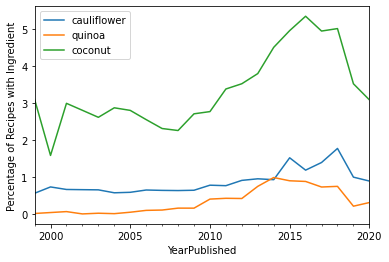

In [17]:
fig4, axes4 = plt.subplots()

cauliflower_percent.loc[:,"proportion"].plot(ax=axes4, label ="cauliflower")
quinoa_percent.loc[:,"proportion"].plot(ax=axes4, label="quinoa")
coconut_percent.loc[:,"proportion"].plot(ax=axes4, label="coconut")

plt.legend()
plt.ylabel("Percentage of Recipes with Ingredient")
plt.title("Popularity of 'Trendy' Ingredients")